# Dataset

In [1]:
# https://www.tensorflow.org/api_docs/python/tf/data/Dataset

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

## From NumPy

If all of your input data fits in memory, the simplest way to create a Dataset from numpy arrays is to convert them to tf.Tensor objects and use Dataset.from_tensor_slices()

In [2]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images_train, labels_train = train
images_train = images_train/255
images_test, labels_test = test
images_test = images_test/255
dataset_train = tf.data.Dataset.from_tensor_slices((images_train, labels_train))
dataset_test = tf.data.Dataset.from_tensor_slices((images_test, labels_test))

In [3]:
images_train.shape, labels_train.shape

((60000, 28, 28), (60000,))

In [4]:
dataset_train

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>

In [5]:
dataset_train.take(1)

<TakeDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>

In [6]:
it = iter(dataset_train)
next(it)[0].numpy().shape, next(it)[1].numpy()

((28, 28), 0)

In [7]:
dataset_train = dataset_train.batch(64)
dataset_test = dataset_test.batch(64)

In [8]:
inputs = keras.Input(shape=(28, 28), name="INPUT")
x = layers.Flatten(name="FLAT")(inputs)
x = layers.Dense(64, activation='relu', name="D1")(x)
x = layers.Dense(64, activation='relu', name="D2")(x)
outputs = layers.Dense(10, name="OUTPUT")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')

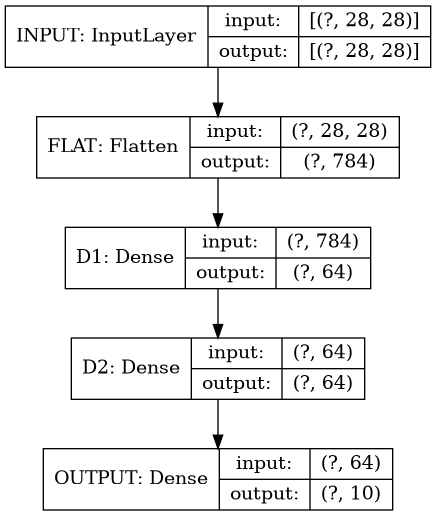

In [9]:
keras.utils.plot_model(model, 'mnist_model.png', show_shapes=True)

In [10]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [11]:
model.fit(dataset_train, epochs=2)

Train for 938 steps
Epoch 1/2
938/938 [==============================] - 7s 8ms/step - loss: 0.5426 - accuracy: 0.8081
Epoch 2/2
938/938 [==============================] - 6s 7ms/step - loss: 0.3895 - accuracy: 0.8585


In [12]:
test_scores = model.evaluate(dataset_test, verbose=2)

157/157 - 1s - loss: 0.3957 - accuracy: 0.8584


## From CSV

In [13]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic_file

'/home/ngshya/.keras/datasets/train.csv'

If your data fits in memory.

In [14]:
df = pd.read_csv(titanic_file, index_col=None)
titanic_slices = tf.data.Dataset.from_tensor_slices(dict(df))

In [15]:
for feature_batch in titanic_slices.take(1):
  for key, value in feature_batch.items():
    print("  {!r:20s}: {}".format(key, value))

  'survived'          : 0
  'sex'               : b'male'
  'age'               : 22.0
  'n_siblings_spouses': 1
  'parch'             : 0
  'fare'              : 7.25
  'class'             : b'Third'
  'deck'              : b'unknown'
  'embark_town'       : b'Southampton'
  'alone'             : b'n'


A more scalable approach is to load from disk as necessary.

In [16]:
titanic_types  = [tf.int32, tf.string, tf.float32, tf.int32, tf.int32, tf.float32, tf.string, tf.string, tf.string, tf.string] 
dataset = tf.data.experimental.CsvDataset(titanic_file, titanic_types , header=True)

for line in dataset.take(10):
  print([item.numpy() for item in line])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 38.0, 1, 0, 71.2833, b'First', b'C', b'Cherbourg', b'n']
[1, b'female', 26.0, 0, 0, 7.925, b'Third', b'unknown', b'Southampton', b'y']
[1, b'female', 35.0, 1, 0, 53.1, b'First', b'C', b'Southampton', b'n']
[0, b'male', 28.0, 0, 0, 8.4583, b'Third', b'unknown', b'Queenstown', b'y']
[0, b'male', 2.0, 3, 1, 21.075, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 27.0, 0, 2, 11.1333, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 14.0, 1, 0, 30.0708, b'Second', b'unknown', b'Cherbourg', b'n']
[1, b'female', 4.0, 1, 1, 16.7, b'Third', b'G', b'Southampton', b'n']
[0, b'male', 20.0, 0, 0, 8.05, b'Third', b'unknown', b'Southampton', b'y']
